In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv("/content/secim.csv", encoding = "ISO-8859-1")
df.head()

,City,Sec_Rnd_RTE_pct,Sec_Rnd_RTE_cnt,Sec_Rnd_KK_pct,Sec_Rnd_KK_cnt,First_Rnd_RTE_pct,First_Rnd_RTE_cnt,First_Rnd_KK_pct,First_Rnd_KK_cnt,First_Rnd_MI_pct,First_Rnd_MI_cnt,First_Rnd_SO_pct,First_Rnd_SO_cnt
0,Adana,45.96,621.003,54.04,730.274,43.93,610.132,50.89,706.780,0.37,5110,4.82,66903
1,Adiyaman,68.84,216.491,31.16,97.982,66.20,211.389,31.24,99.771,0.38,1203,2.18,6963
2,Afyon,67.84,312.452,32.16,148.136,63.86,301.938,28.87,136.507,0.56,2645,6.71,31711
3,Agri,34.66,68.790,65.34,129.693,31.72,68.468,65.80,142.021,0.40,873,2.08,4489
4,Amasya,59.16,134.428,40.84,92.811,56.25,130.248,38.04,88.091,0.39,907,5.31,12301


In [4]:
# df['Sec_Rnd_RTE_cnt'].astype(str).astype(int)
type_cnv_cols = ['Sec_Rnd_RTE_cnt','Sec_Rnd_KK_cnt','First_Rnd_RTE_cnt','First_Rnd_KK_cnt']
for col in type_cnv_cols:
  df[col] = df[col].astype('str').str.replace(r".", r"", regex=False).astype(int)

df['First_Rnd_Turnout_cnt'] = df['First_Rnd_RTE_cnt'] + df['First_Rnd_KK_cnt'] + df['First_Rnd_MI_cnt'] + df['First_Rnd_SO_cnt']
df['Sec_Rnd_Turnout_cnt'] = df['Sec_Rnd_RTE_cnt'] + df['Sec_Rnd_KK_cnt']


# Testing the call of KK to his supporters to vote.
Is there a significant turnout rate difference in cities where KK get the most of the vote vs RTE?

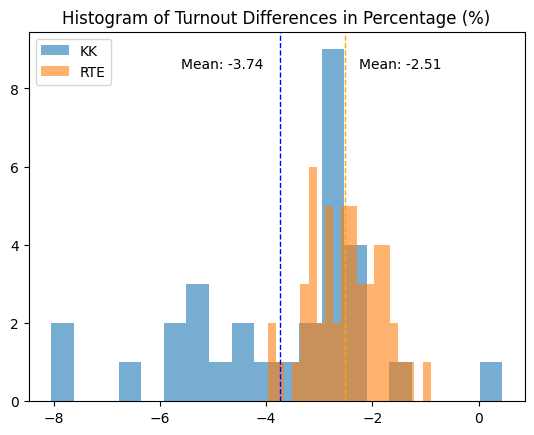

In [8]:
df['Rnd_Turnout_Diff_pct'] = 100 * (df['Sec_Rnd_Turnout_cnt'] - df['First_Rnd_Turnout_cnt']) / df['First_Rnd_Turnout_cnt']
df_KK = df[df['First_Rnd_KK_cnt'] > df['First_Rnd_RTE_cnt']]
df_RTE = df[df['First_Rnd_KK_cnt'] < df['First_Rnd_RTE_cnt']]

from matplotlib import pyplot

x = df_KK['Rnd_Turnout_Diff_pct']
y = df_RTE['Rnd_Turnout_Diff_pct']

pyplot.hist(x, 20, alpha=0.6, label='KK')
plt.axvline(x.mean(), color='blue', linestyle='dashed', linewidth=1)
pyplot.hist(y, 20, alpha=0.6, label='RTE')
plt.axvline(y.mean(), color='orange', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.5, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))
plt.text(y.mean()*0.9, max_ylim*0.9, 'Mean: {:.2f}'.format(y.mean()))
pyplot.legend(loc='upper left')
plt.title("Histogram of Turnout Differences in Percentage (%)")
pyplot.show()



There are 30 cities where KK was leading in the first round and 51 cities where RTE leading. Here in the plot we compare pct of turnout changes where candidates were leading in the first round.
According to the plot above KK's call of vote was not responded well by voters.

## How changed candidates votes pct?

,City,Rnd_Diff_RTE_pct,Rnd_Diff_KK_pct,Rnd_pct_Diff_KK_RTE
0,Adana,1.781746,3.324090,1.542344
1,Adiyaman,2.413560,-1.793106,-4.206666
2,Afyon,3.482172,8.518977,5.036805
3,Agri,0.470293,-8.680406,-9.150699
4,Amasya,3.209262,5.358096,2.148833
...,...,...,...,...
76,Yalova,1.918477,5.345268,3.426791
77,Karabuk,4.369889,10.104639,5.734751
78,Kilis,3.401201,7.556995,4.155794
79,Osmaniye,2.905828,6.537670,3.631843


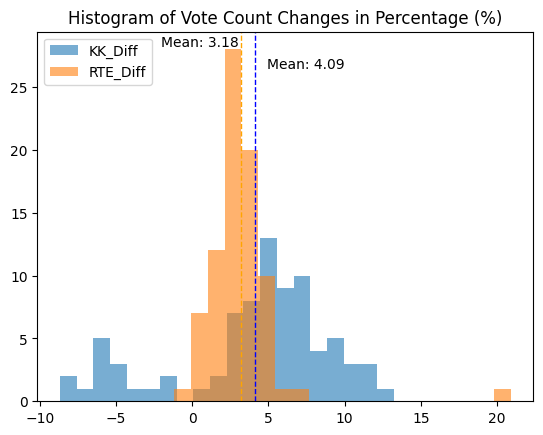

In [9]:
df['Rnd_Diff_RTE_pct'] = 100 * (df['Sec_Rnd_RTE_cnt'] - df['First_Rnd_RTE_cnt']) / df['First_Rnd_RTE_cnt']
df['Rnd_Diff_KK_pct'] = 100 * (df['Sec_Rnd_KK_cnt'] - df['First_Rnd_KK_cnt']) / df['First_Rnd_KK_cnt']
df['Rnd_pct_Diff_KK_RTE'] = df['Rnd_Diff_KK_pct'] - df['Rnd_Diff_RTE_pct']

display(df[['City','Rnd_Diff_RTE_pct','Rnd_Diff_KK_pct','Rnd_pct_Diff_KK_RTE']])

x = df['Rnd_Diff_KK_pct']
y = df['Rnd_Diff_RTE_pct']
z = df['Rnd_pct_Diff_KK_RTE']

pyplot.hist(x, 20, alpha=0.6, label='KK_Diff')
plt.axvline(x.mean(), color='blue', linestyle='dashed', linewidth=1)
pyplot.hist(y, 20, alpha=0.6, label='RTE_Diff')
plt.axvline(y.mean(), color='orange', linestyle='dashed', linewidth=1)
# pyplot.hist(z, 20, alpha=0.6, label='KK_RTE_Diff')
min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.2, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))
plt.text(-y.mean()*0.65, max_ylim*0.96, 'Mean: {:.2f}'.format(y.mean()))
pyplot.legend(loc='upper left')
plt.title("Histogram of Vote Count Changes in Percentage (%)")
pyplot.show()


RTE increased his votes all cities except Batman (-%1.19). RTE increased his votes in Igdir (+%20). KK increased his votes most in Kayseri and decreased most in Agri

# How KK nationalist speeches after first round responded

In [10]:
# Cities where IYIP and MHP get vote over %25 in the first round. IYIP: 9,68 MHP: 10,07 and Total=19,75
# In some cities IYIP didn't have candidates

df_par = pd.read_csv("/content/secim_mv.csv", encoding = "ISO-8859-1")
df_par.head()


,City,AKP,MHP,CHP,IYIP,YSP
0,Adana,30.84,11.03,28.63,10.74,9.73
1,Adiyaman,52.33,4.35,18.75,0.00,12.01
2,Afyon,44.17,16.06,18.79,12.35,0.64
3,Agri,25.37,2.58,11.16,1.71,54.46
4,Aksaray,44.13,21.01,0.00,24.69,0.91


In [11]:
df["City"]= df["City"].astype("string")
df_par["City"]= df_par["City"].astype("string")

In [12]:
df_par['Tot_IYIP_MHP'] = df_par['IYIP'] + df_par['MHP']
df_nat = df_par[df_par['Tot_IYIP_MHP'] > 25]

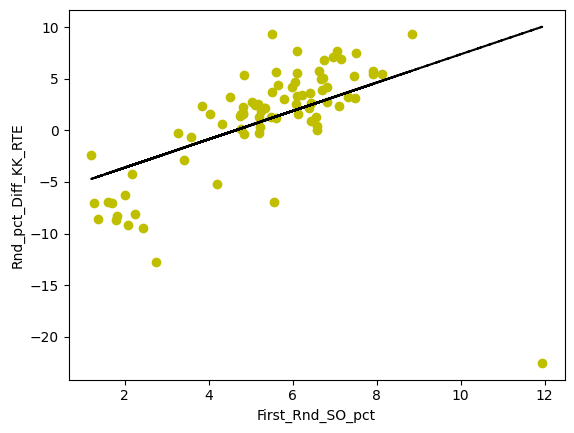

Pearson Correlation Coefficient between KK Diff and SO pct (without Igdir): 0.8306001040759013


In [14]:
x = df['First_Rnd_SO_pct']
y = df['Rnd_pct_Diff_KK_RTE']

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker
plt.xlabel("First_Rnd_SO_pct")
plt.ylabel("Rnd_pct_Diff_KK_RTE")
plt.show()

df_no_igdir = df[df['City']!='Igdir']

print(f"Pearson Correlation Coefficient between KK RTE Diff and SO pct (without Igdir): {df_no_igdir['Rnd_pct_Diff_KK_RTE'].corr(df_no_igdir['First_Rnd_SO_pct'])}")

High correlation indicates KK was successful at getting SO's votes better than RTE in overall

,City,AKP,MHP,CHP,IYIP,YSP,Tot_IYIP_MHP,Rnd_Diff_RTE_pct,Rnd_Diff_KK_pct,First_Rnd_SO_pct,Rnd_pct_Diff_KK_RTE
0,Afyon,44.17,16.06,18.79,12.35,0.64,28.41,3.482172,8.518977,6.71,5.036805
1,Aksaray,44.13,21.01,0.00,24.69,0.91,45.70,3.021406,7.418697,5.64,4.397291
2,Bayburt,59.95,16.61,0.00,15.97,0.75,32.58,2.521030,11.838624,5.51,9.317594
3,Bolu,37.01,23.26,21.88,7.43,1.12,30.69,3.659530,11.122946,7.50,7.463416
4,Burdur,36.61,14.03,31.07,11.38,0.93,25.41,5.227199,5.292048,6.57,0.064848
5,cankiri,42.73,31.15,0.00,17.71,0.62,48.86,4.144734,11.869140,7.06,7.724406
6,Edirne,23.83,7.73,39.38,20.46,2.05,28.19,0.852513,3.187805,3.84,2.335292
7,Erzurum,43.32,16.67,7.04,9.50,9.90,26.17,3.664406,4.056964,6.57,0.392558
8,Giresun,43.13,15.61,20.66,12.71,0.56,28.32,3.640816,4.926372,5.48,1.285556
9,Gumushane,47.78,26.44,0.00,18.31,0.63,44.75,3.662450,5.814848,5.34,2.152398


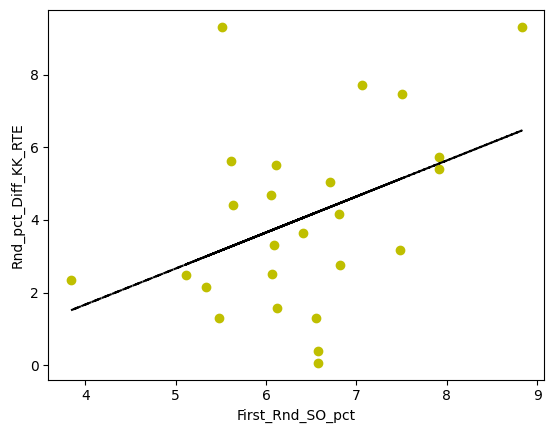

Pearson Correlation Coeffcient between KK Diff and SO pct: 0.407891970708202


In [ ]:
# Closer Look At Nationalist Cities
df_nat_all = df_nat.merge(df,on='City', how='left')

display(df_nat_all[['City','AKP','MHP','CHP','IYIP','YSP','Tot_IYIP_MHP','Rnd_Diff_RTE_pct','Rnd_Diff_KK_pct','First_Rnd_SO_pct','Rnd_pct_Diff_KK_RTE']])

x = df_nat_all['First_Rnd_SO_pct']
y = df_nat_all['Rnd_pct_Diff_KK_RTE']

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker
plt.xlabel("First_Rnd_SO_pct")
plt.ylabel("Rnd_pct_Diff_KK_RTE")
plt.show()

print(f"Pearson Correlation Coeffcient between KK Diff and SO pct: {df_nat_all['Rnd_pct_Diff_KK_RTE'].corr(df_nat_all['First_Rnd_SO_pct'])}")

KK increased his vote in all nationalist cities. It seems nationalist speech was helpful gaining attention of SO votes

In [ ]:
# YSP leaning cities -> YSP Overall Pct: 8.82 -> cities where YSP has %25
df_ysp = df_par[df_par['YSP'] > 25]
df_ysp

,City,AKP,MHP,CHP,IYIP,YSP,Tot_IYIP_MHP
3,Agri,25.37,2.58,11.16,1.71,54.46,4.29
13,Batman,29.22,1.47,8.46,0.00,57.79,1.47
17,Bitlis,37.71,3.87,0.00,13.01,40.17,16.88
25,Diyarbakir,23.22,1.48,8.24,2.28,60.93,3.76
35,Hakkari,20.63,2.99,7.25,0.00,62.45,2.99
37,Igdir,35.25,4.76,6.58,6.58,43.55,11.34
44,Kars,25.81,9.74,16.51,14.89,27.90,24.63
56,Mardin,25.20,3.49,7.15,1.20,54.63,4.69
59,Mus,21.51,16.60,0.00,5.54,50.57,22.14
67,Siirt,35.98,3.90,7.76,1.50,46.68,5.40


,City,AKP,MHP,CHP,IYIP,YSP,Tot_IYIP_MHP,Rnd_Diff_RTE_pct,Rnd_Diff_KK_pct,First_Rnd_SO_pct,Rnd_pct_Diff_KK_RTE
0,Agri,25.37,2.58,11.16,1.71,54.46,4.29,0.470293,-8.680406,2.08,-9.150699
1,Batman,29.22,1.47,8.46,0.00,57.79,1.47,-1.192472,-3.549486,1.20,-2.357014
2,Bitlis,37.71,3.87,0.00,13.01,40.17,16.88,1.514871,-6.592775,2.25,-8.107646
3,Diyarbakir,23.22,1.48,8.24,2.28,60.93,3.76,0.936925,-6.108074,1.26,-7.045000
4,Hakkari,20.63,2.99,7.25,0.00,62.45,2.99,6.900075,-5.830615,2.74,-12.730691
6,Kars,25.81,9.74,16.51,14.89,27.90,24.63,4.774155,-2.204724,5.56,-6.978879
7,Mardin,25.20,3.49,7.15,1.20,54.63,4.69,3.526771,-5.080783,1.36,-8.607554
8,Mus,21.51,16.60,0.00,5.54,50.57,22.14,0.834928,-6.198914,1.69,-7.033843
9,Siirt,35.98,3.90,7.76,1.50,46.68,5.40,2.442748,-5.867414,1.82,-8.310162
10,sirnak,21.45,2.46,8.70,1.16,62.67,3.62,5.076186,-4.396104,2.44,-9.472290


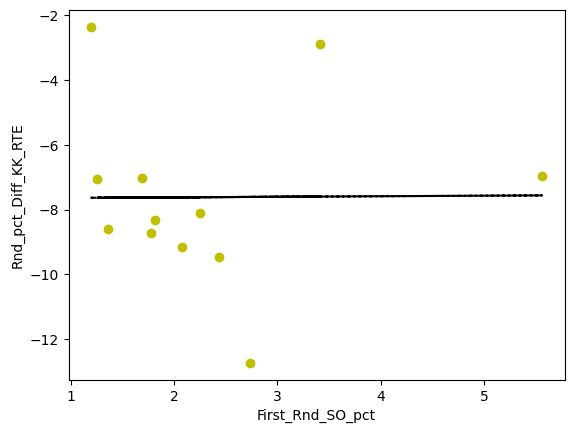

Pearson Correlation Coeffcient between KK Diff and SO pct: 0.0073420806258775295


In [ ]:
# perc changes difference
df_ysp_all = df_ysp.merge(df,on='City', how='left')

df_ysp_all = df_ysp_all[df_ysp_all['City']!='Igdir']

display(df_ysp_all[['City','AKP','MHP','CHP','IYIP','YSP','Tot_IYIP_MHP','Rnd_Diff_RTE_pct','Rnd_Diff_KK_pct','First_Rnd_SO_pct','Rnd_pct_Diff_KK_RTE']])

x = df_ysp_all['First_Rnd_SO_pct']
y = df_ysp_all['Rnd_pct_Diff_KK_RTE']

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker
plt.xlabel("First_Rnd_SO_pct")
plt.ylabel("Rnd_pct_Diff_KK_RTE")
plt.show()

print(f"Pearson Correlation Coeffcient between KK Diff and SO pct: {df_ysp_all['Rnd_pct_Diff_KK_RTE'].corr(df_ysp_all['First_Rnd_SO_pct'])}")

RTE performed better than KK in all YSP-leaning cities regardless of SO vote rates. Overall it indicates voters who preferred SO in first round over KK voted KK in second round. However